<a href="https://colab.research.google.com/github/nguyenduongtri5703/ml_project_nhom_28/blob/main/Project_ML_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/dataset


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from keras.utils import to_categorical
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
%pylab inline
#%run Utils.ipynb
# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# đọc dữ liệu
anime = pd.read_csv('anime-dataset-2023.csv')

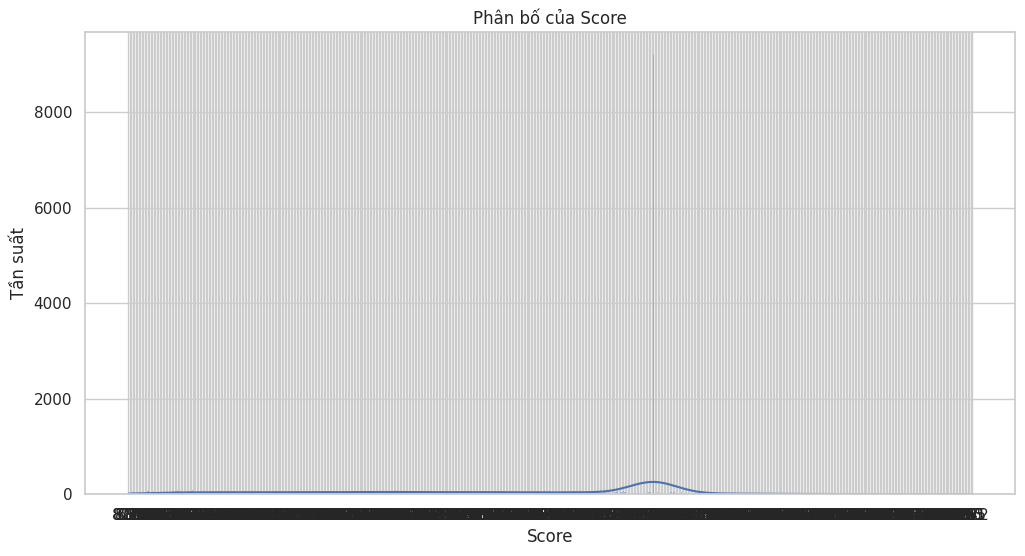

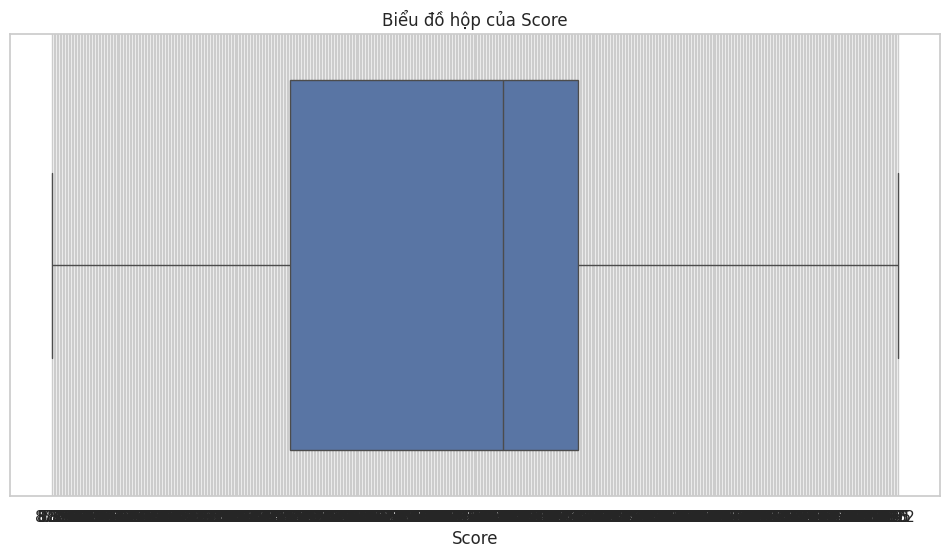

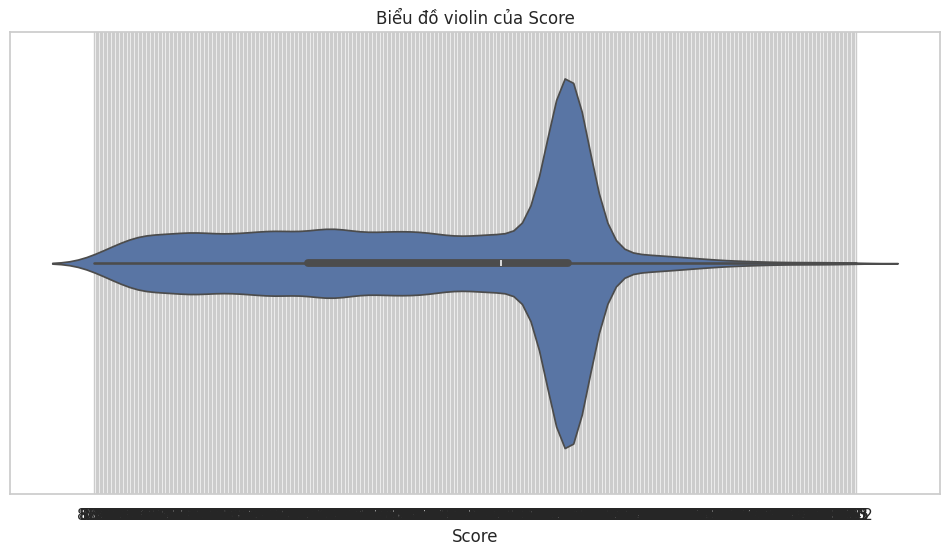

In [ ]:
# Thiết lập phong cách của seaborn
sns.set(style="whitegrid")

# Vẽ biểu đồ phân bố (histogram) cho cột Score
plt.figure(figsize=(12, 6))
sns.histplot(anime['Score'], kde=True, bins=30)
plt.title('Phân bố của Score')
plt.xlabel('Score')
plt.ylabel('Tần suất')
plt.show()

# Vẽ biểu đồ hộp (box plot) cho cột Score
plt.figure(figsize=(12, 6))
sns.boxplot(x=anime['Score'])
plt.title('Biểu đồ hộp của Score')
plt.xlabel('Score')
plt.show()

# Vẽ biểu đồ violin cho cột Score để thấy phân bố chi tiết hơn
plt.figure(figsize=(12, 6))
sns.violinplot(x=anime['Score'])
plt.title('Biểu đồ violin của Score')
plt.xlabel('Score')
plt.show()

In [ ]:

# Loại bỏ các cột không cần thiết
# 'anime_id', 'English name', 'Other name', 'Synopsis', 'Status', 'Source','Image URL',
# 'Premiered', 'Producers', 'Licensors'
anime_new = anime.drop(columns=['anime_id', 'English name', 'Other name', 'Synopsis', 'Status', 'Source','Image URL',
                        'Premiered', 'Producers', 'Licensors', 'Aired', 'Duration', 'Episodes'])
anime_new

,Name,Score,Genres,Type,Studios,Rating,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,Bones,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation,PG - Children,4240.0,5126,14,6413.0,15001
...,...,...,...,...,...,...,...,...,...,...,...
24900,Wu Nao Monu,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0
24901,Bu Xing Si: Yuan Qi,UNKNOWN,"Action, Adventure, Fantasy",ONA,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0
24902,Di Yi Xulie,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0
24903,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,Music,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0


In [ ]:
# Loại bỏ các hàng có giá trị UNKNOWN
row_unknown_values = anime_new[anime_new.eq('UNKNOWN').any(axis=1)]
# Cập nhật lại dataset
anime_cleaned = anime_new.drop(row_unknown_values.index)
anime_cleaned

,Name,Score,Genres,Type,Studios,Rating,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,Bones,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation,PG - Children,4240.0,5126,14,6413.0,15001
...,...,...,...,...,...,...,...,...,...,...,...
24360,"Kanojo, Okarishimasu Petit Special",5.21,Comedy,Special,AQUA ARIS,PG-13 - Teens 13 or older,11569.0,11232,3,414.0,1632
24407,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Li...,6.09,"Comedy, Mystery",ONA,Gravity Well,PG-13 - Teens 13 or older,8412.0,13727,0,221.0,717
24539,One Piece: Dai Gekisen Tokushuu! Zoro vs. Ooka...,6.47,"Action, Adventure, Comedy, Fantasy",Special,Toei Animation,PG-13 - Teens 13 or older,6536.0,11725,1,722.0,1367
24579,Mashle: Mash Burnedead to Fushigi na Tegami,5.84,"Action, Comedy, Fantasy",Special,A-1 Pictures,PG-13 - Teens 13 or older,9552.0,8772,10,1971.0,3828


In [ ]:
missing_values = anime_cleaned.isnull().sum()
print(missing_values)
nan_values = anime_cleaned.isna().sum()
print(nan_values)

Name          0
Score         0
Genres        0
Type          0
Studios       0
Rating        0
Rank          0
Popularity    0
Favorites     0
Scored By     0
Members       0
dtype: int64
Name          0
Score         0
Genres        0
Type          0
Studios       0
Rating        0
Rank          0
Popularity    0
Favorites     0
Scored By     0
Members       0
dtype: int64


In [ ]:
# encode dữ liệu categorical
label_encoder = LabelEncoder()
categorical_data = ['Name','Genres', 'Type', 'Rating', 'Studios']
for col in categorical_data:
    anime_cleaned[col] = label_encoder.fit_transform(anime_cleaned[col])
print(anime_cleaned)

       Name Score  Genres  Type  Studios  Rating     Rank  Popularity  \
0      1516  8.75     137     4      902       3     41.0          43   
1      1518  8.38     307     0      139       3    189.0         602   
2      9020  8.22     107     4      479       2    328.0         246   
3      9486  7.25     235     4      902       2   2764.0        1795   
4      1029  6.94     434     4      978       1   4240.0        5126   
...     ...   ...     ...   ...      ...     ...      ...         ...   
24360  4213  5.21     561     3       44       2  11569.0       11232   
24407  5044  6.09     630     1      316       2   8412.0       13727   
24539  6391  6.47      26     3      978       2   6536.0       11725   
24579  5577  5.84     166     3        5       2   9552.0        8772   
24590  5043  5.99     187     1      330       2   8891.0       14796   

       Favorites Scored By  Members  
0          78525  914193.0  1771505  
1           1448  206248.0   360978  
2        

In [ ]:
# Chia tập dữ liệu
X = anime_cleaned.drop(columns=['Score'])
y = anime_cleaned['Score']
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train = len(X_train)
test = len(X_test)
print(f"Số mẫu trong tập train: {train}")
print(f"Số mẫu trong tập test: {test}")

Số mẫu trong tập train: 7023
Số mẫu trong tập test: 3010


In [ ]:
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)
# Đánh giá kết quả dự đoán
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Absolute Error:  0.0009582392026628769
Mean Squared Error:  3.6754275747510486e-05
R-squared:  0.9999462160922152


In [ ]:
# Mô hình Neural Network
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Chuyển đổi kiểu dữ liệu thành float32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# Xây dựng mô hình CNN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 7.7159 - val_loss: 0.8547
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 1.3773 - val_loss: 0.4865
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 1.0436 - val_loss: 0.3224
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.8737 - val_loss: 0.2193
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.7300 - val_loss: 0.1694
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6650 - val_loss: 0.1197
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6171 - val_loss: 0.1243
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5661 - val_loss: 0.1355
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5511 - val_loss: 0.0883
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5371 - val_loss: 0.0573

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

95/95 [==============================] - 0s 3ms/step
Mean Absolute Error: 4.013417720794678
Mean Squared Error: 22.789020538330078
R-squared: -32.34802856385582
